<a href="https://colab.research.google.com/github/RinoGeek/DiabeteX-Predictor/blob/main/diabetes_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/sample_data/diabetes_data.csv')
df.head(100).T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Diabetes_012,0.0,2.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,2.0
HighBP,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
HighChol,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
CholCheck,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
BMI,15.0,28.0,33.0,29.0,24.0,40.0,27.0,24.0,30.0,36.0,...,18.0,23.0,25.0,21.0,34.0,44.0,19.0,23.0,31.0,29.0
Smoker,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
Stroke,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
HeartDiseaseorAttack,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
PhysActivity,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
Fruits,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


from matplotlib import pyplot as plt
_df_0[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1[1].plot(kind='hist', bins=20, title=1)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2[2].plot(kind='hist', bins=20, title=2)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3[3].plot(kind='hist', bins=20, title=3)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x=0, y=1, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x=1, y=2, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x=2, y=3, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x=3, y=4, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10[2].plot(kind='line', figsize=(8, 4), title=2)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11[3].plot(kind='line', figsize=(8, 4), title=3)
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.nunique()

Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                  11
dtype: int64

In [ ]:
df.shape

(236378, 22)

In [ ]:
df.drop_duplicates(keep='last', inplace=True)
df.shape

(223550, 22)

In [ ]:
print(f"Dataset : \n {df.shape[0]} enregistrements \n {df.shape[1]} variables")

Dataset : 
 223550 enregistrements 
 22 variables


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,223550.0,0.323878,0.719551,0.0,0.0,0.0,0.0,2.0
HighBP,223550.0,0.431626,0.495304,0.0,0.0,0.0,1.0,1.0
HighChol,223550.0,0.410946,0.492007,0.0,0.0,0.0,1.0,1.0
CholCheck,223550.0,0.961503,0.192393,0.0,1.0,1.0,1.0,1.0
BMI,223550.0,29.132208,6.643441,12.0,25.0,28.0,32.0,99.0
Smoker,223550.0,0.425900,0.494480,0.0,0.0,0.0,1.0,1.0
Stroke,223550.0,0.041118,0.198564,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,223550.0,0.091080,0.287724,0.0,0.0,0.0,0.0,1.0
PhysActivity,223550.0,0.767135,0.422658,0.0,1.0,1.0,1.0,1.0
Fruits,223550.0,0.607895,0.488221,0.0,0.0,1.0,1.0,1.0


from matplotlib import pyplot as plt
_df_12['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['25%'].plot(kind='hist', bins=20, title='25%')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='min', y='25%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='25%', y='50%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['mean']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_20.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('mean')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['std']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_21.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('std')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['min']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_22.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('min')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['25%']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('25%')

from matplotlib import pyplot as plt
_df_24['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_25['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['25%'].plot(kind='line', figsize=(8, 4), title='25%')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df[df.isna()].count()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:

df = df.rename(columns= {'HighBP': 'Hypertension_artérielle'})
df = df.rename(columns= {'HighChol': 'Cholestérol_élevé'})
df = df.rename(columns= {'CholCheck': 'Test_cholestérol'})
df = df.rename(columns= {'BMI': 'Masse_corporelle'})
df = df.rename(columns= {'Smoker': 'Fumeur'})
df = df.rename(columns= {'Stroke': 'AVC'})
df = df.rename(columns= {'HeartDiseaseorAttack': 'Attaque_cardiaque'})
df = df.rename(columns= {'PhysActivity': 'Activité_physique'})
df = df.rename(columns= {'Fruits': 'Consommation_fruits'})
df = df.rename(columns= {'Veggies': 'Consommation_légumes'})
df = df.rename(columns= {'HvyAlcoholConsump': 'Consommation_excessive_alcool'})
df = df.rename(columns= {'AnyHealthcare': 'Accès_soins_santé'})
df = df.rename(columns= {'NoDocbcCost': 'Aucun_médecin(pauvreté)'})
df = df.rename(columns= {'GenHlth': 'Santé_général'})
df = df.rename(columns= {'MentHlth': 'Santé_mentale'})
df = df.rename(columns= {'PhysHlth': 'Santé_physique'})
df = df.rename(columns= {'DiffWalk': 'Difficulté_marcher'})
df = df.rename(columns= {'Sex': 'Sexe'})
df = df.rename(columns= {'Age': 'Age'})
df = df.rename(columns= {'Education': 'Education'})


print(""" Voici une traduction en français des libellés que vous avez fournis : \n
    Diabetes_012 :  Diabète (0 : Non, 1 : Oui, 2 : Ne sait pas/Refus de répondre) \n
    HighBP :  Hypertension artérielle \n
    HighChol :  Cholestérol élevé \n
    CholCheck :  Test de cholestérol (A effectué un test, B n'a pas effectué de test) \n
    BMI :  Indice de masse corporelle \n
    Smoker : Fumeur (Oui/Non) \n
    Stroke :  Accident vasculaire cérébral \n
    HeartDiseaseorAttack :  Maladie cardiaque ou attaque cardiaque \n
    PhysActivity :  Activité physique \n
    Fruits :  Consommation de fruits \n
    Veggies :  Consommation de légumes \n
    HvyAlcoholConsump :  Consommation excessive d'alcool \n
    AnyHealthcare : Accès à des soins de santé \n
    NoDocbcCost :  Aucun médecin en raison des coûts \n
    GenHlth :  État de santé général \n
    MentHlth :  Santé mentale \n
    PhysHlth :  Santé physique \n
    DiffWalk :  Difficulté à marcher \n
    Sex :  Sexe \n
    Age :  Âge \n
    Education :  Niveau d'éducation \n
    Income :  Revenu \n """)

 Voici une traduction en français des libellés que vous avez fournis : 

    Diabetes_012 :  Diabète (0 : Non, 1 : Oui, 2 : Ne sait pas/Refus de répondre) 

    HighBP :  Hypertension artérielle 

    HighChol :  Cholestérol élevé 

    CholCheck :  Test de cholestérol (A effectué un test, B n'a pas effectué de test) 

    BMI :  Indice de masse corporelle 

    Smoker : Fumeur (Oui/Non) 

    Stroke :  Accident vasculaire cérébral 

    HeartDiseaseorAttack :  Maladie cardiaque ou attaque cardiaque 

    PhysActivity :  Activité physique 

    Fruits :  Consommation de fruits 

    Veggies :  Consommation de légumes 

    HvyAlcoholConsump :  Consommation excessive d'alcool 

    AnyHealthcare : Accès à des soins de santé 

    NoDocbcCost :  Aucun médecin en raison des coûts 

    GenHlth :  État de santé général 

    MentHlth :  Santé mentale 

    PhysHlth :  Santé physique 

    DiffWalk :  Difficulté à marcher 

    Sex :  Sexe 

    Age :  Âge 

    Education :  Niveau d'éducat

In [ ]:
print("le pourcentage de la population dont on ne connais pas le statu (diabétique ou non) :")
non_teste = df[df['Diabetes_012'] == 2.0]["Diabetes_012"].count()
print(round((non_teste / df.shape[0])*100, 2),"%")

le pourcentage de la population dont on ne connais pas le statu (diabétique ou non) :
14.94 %


In [ ]:
print("le pourcentage de la population ayant le diabète :")
malade = df[df['Diabetes_012'] == 1]["Diabetes_012"].count()
print(round((malade / df.shape[0])*100, 2),"%")

le pourcentage de la population ayant le diabète :
2.51 %


In [ ]:
print("le pourcentage de la population n'ayant pas le diabète :")
pas_malade = df[df['Diabetes_012'] == 0]["Diabetes_012"].count()
print(round((pas_malade / df.shape[0])*100, 2),"%")

le pourcentage de la population n'ayant pas le diabète :
82.55 %


In [ ]:
for col in df.columns:
  print('Correlation entre le diabète et le',col, round(df["Diabetes_012"].corr(df[col]), 2))

Correlation entre le diabète et le Diabetes_012 1.0
Correlation entre le diabète et le Hypertension_artérielle 0.26
Correlation entre le diabète et le Cholestérol_élevé 0.2
Correlation entre le diabète et le Test_cholestérol 0.08
Correlation entre le diabète et le Masse_corporelle 0.2
Correlation entre le diabète et le Fumeur 0.05
Correlation entre le diabète et le AVC 0.1
Correlation entre le diabète et le Attaque_cardiaque 0.17
Correlation entre le diabète et le Activité_physique -0.14
Correlation entre le diabète et le Consommation_fruits -0.02
Correlation entre le diabète et le Consommation_légumes -0.04
Correlation entre le diabète et le Consommation_excessive_alcool -0.06
Correlation entre le diabète et le Accès_soins_santé 0.03
Correlation entre le diabète et le Aucun_médecin(pauvreté) 0.01
Correlation entre le diabète et le Santé_général 0.28
Correlation entre le diabète et le Santé_mentale 0.03
Correlation entre le diabète et le Santé_physique 0.16
Correlation entre le diabète

<Axes: >

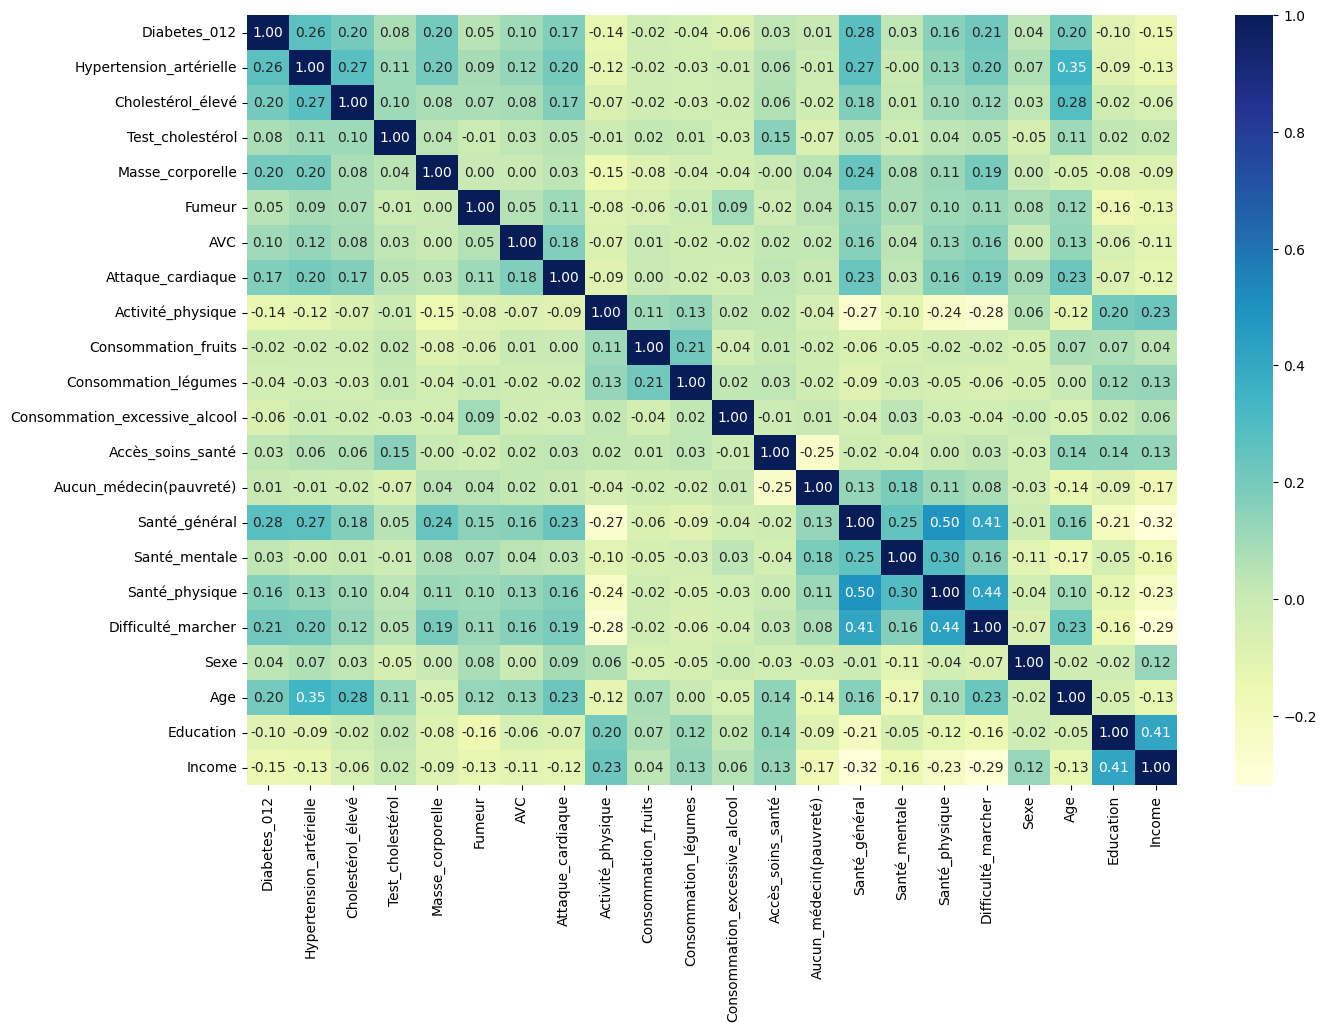

In [ ]:
def heatmap(df, figsize=(10, 20)):
  df = df.astype(int)
  plt.figure(figsize=(15, 10))
  return sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
heatmap(df)

In [ ]:
px.pie(df, values='Diabetes_012', names='Diabetes_012')

In [ ]:
df_2 = df[df["Diabetes_012"] == 2]
print(df_2.shape)
df.drop(df[df['Diabetes_012'] == 2.0].index, inplace=True, axis=0)
print(df.shape)

(33395, 22)
(190155, 22)


<ipython-input-23-68c6035461fa>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



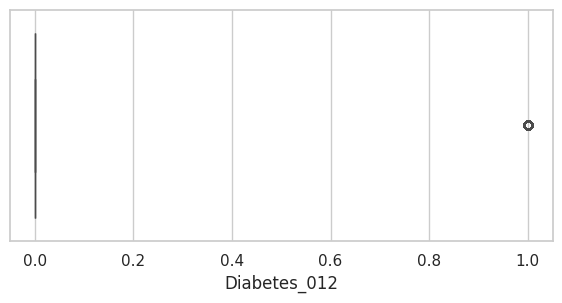

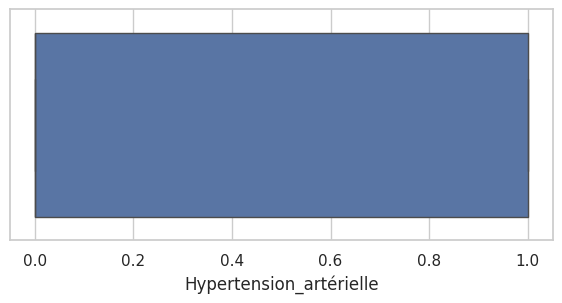

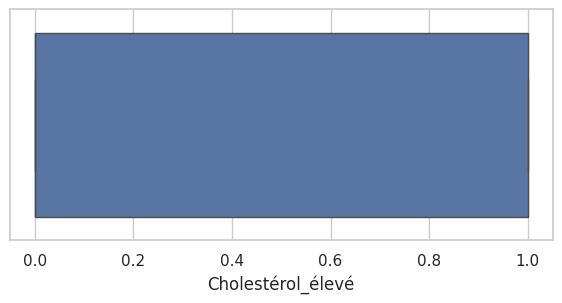

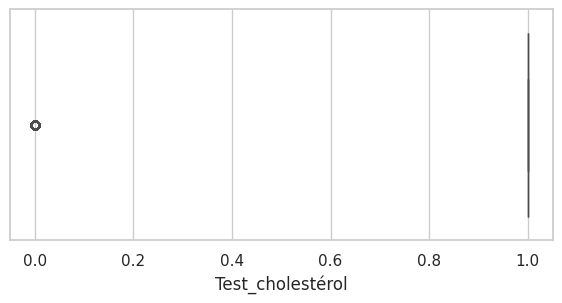

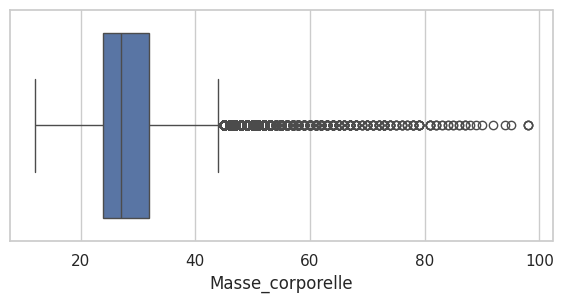

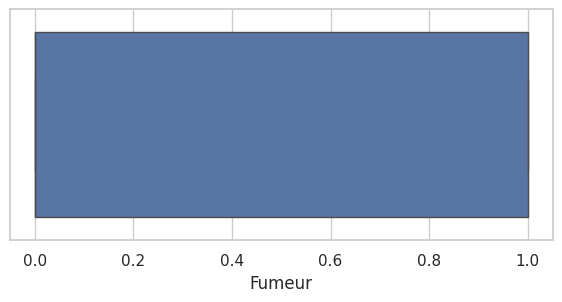

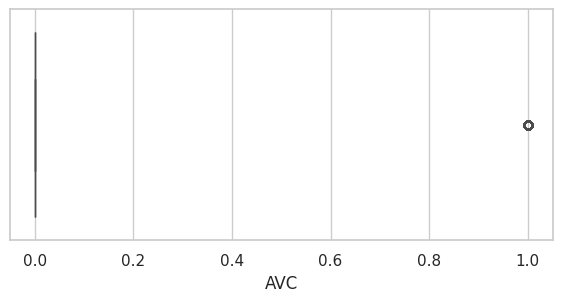

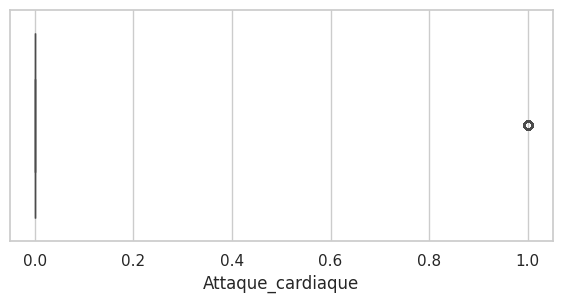

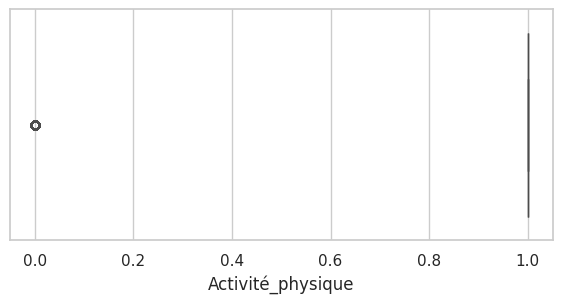

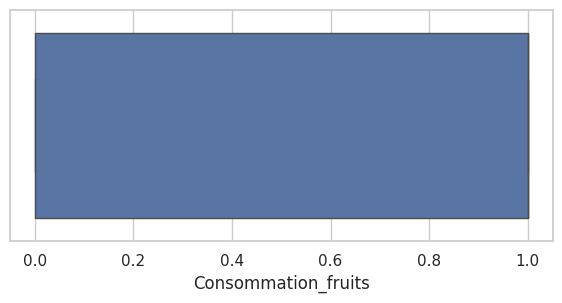

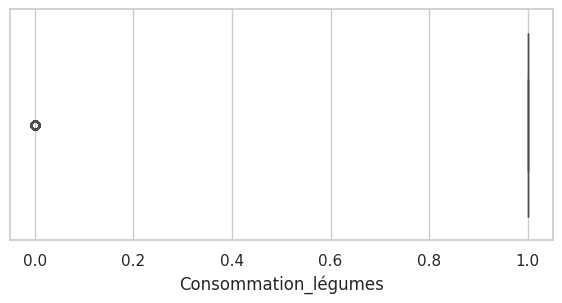

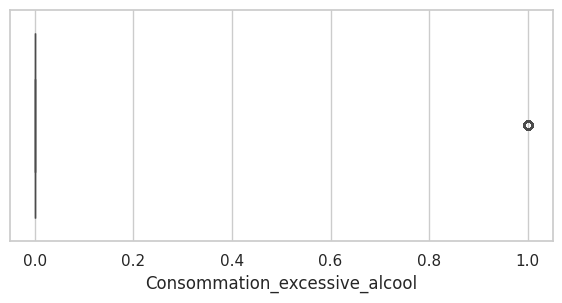

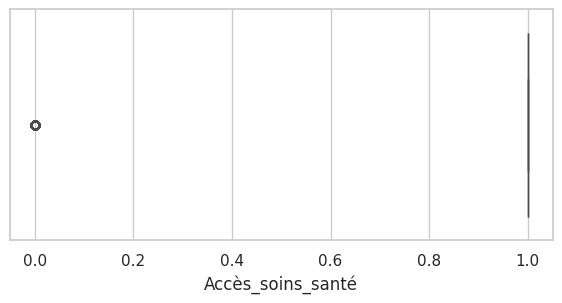

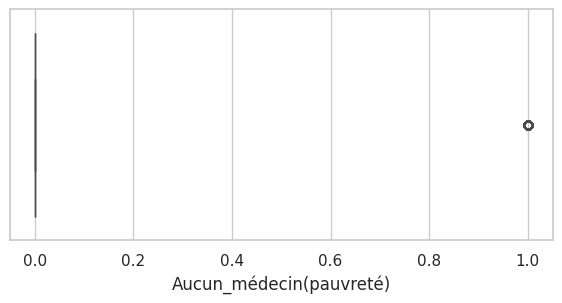

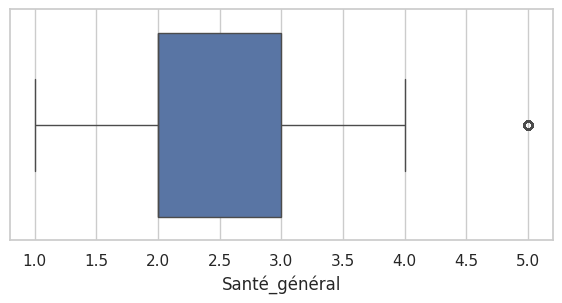

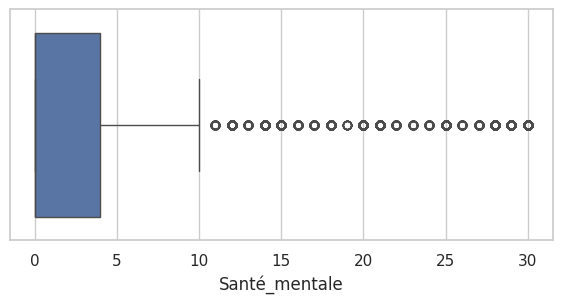

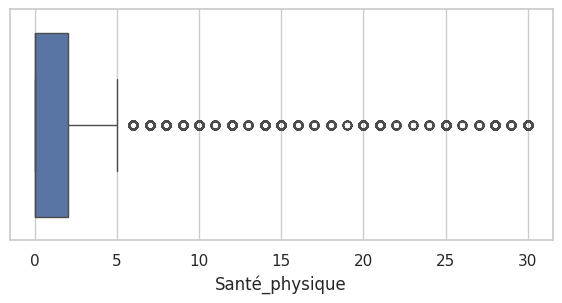

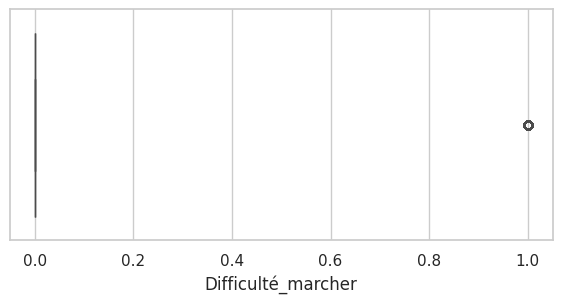

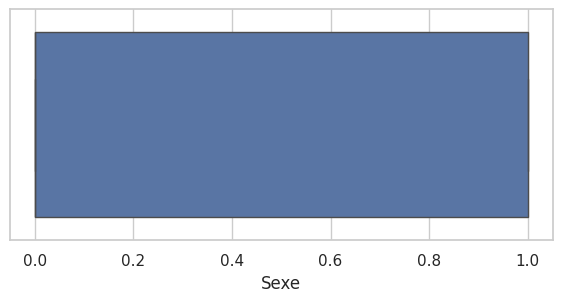

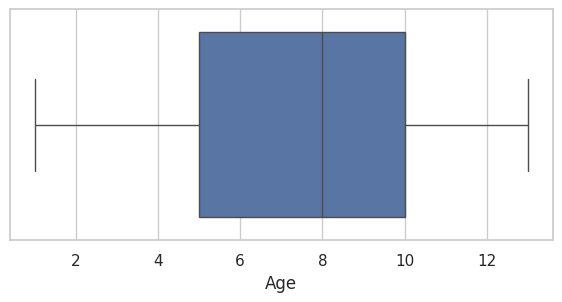

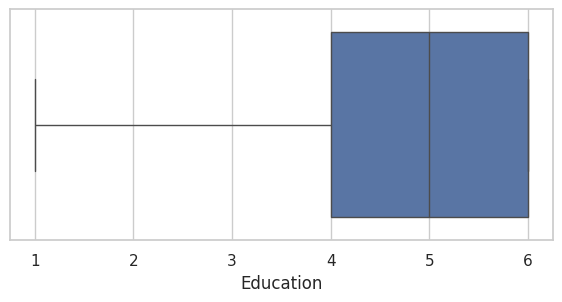

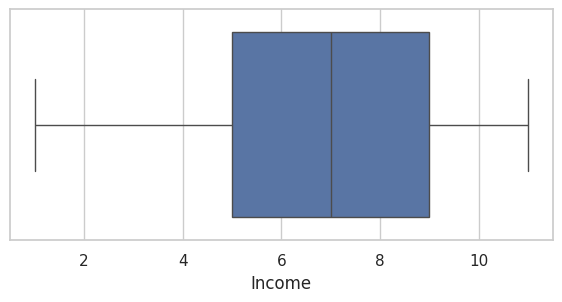

In [ ]:
def boxplot(column):
  sns.set(style = 'whitegrid')
  plt.figure(figsize=(7, 3))
  sns.boxplot(df[column], orient='h')

for column in df.columns:
    boxplot(column)

<ipython-input-24-4f9942ec0008>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



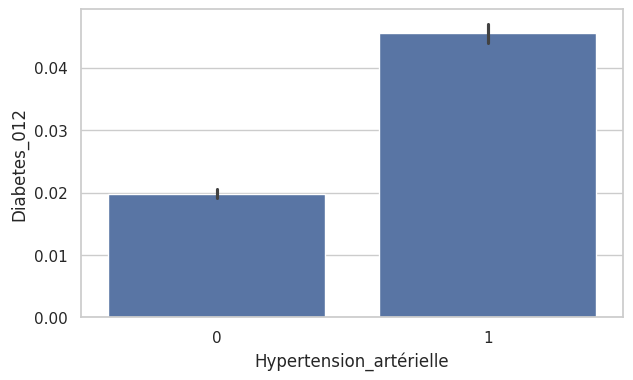

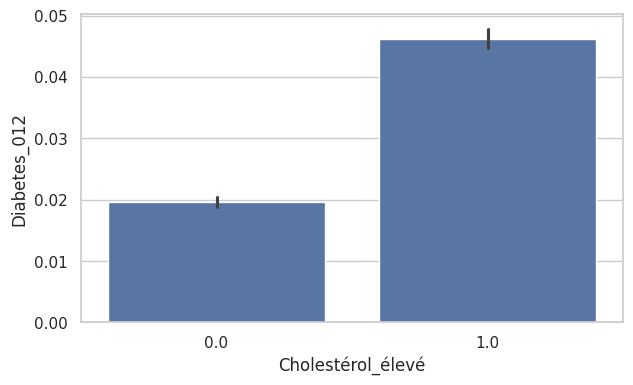

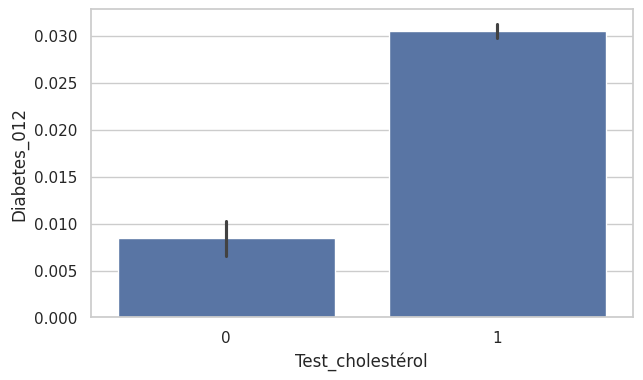

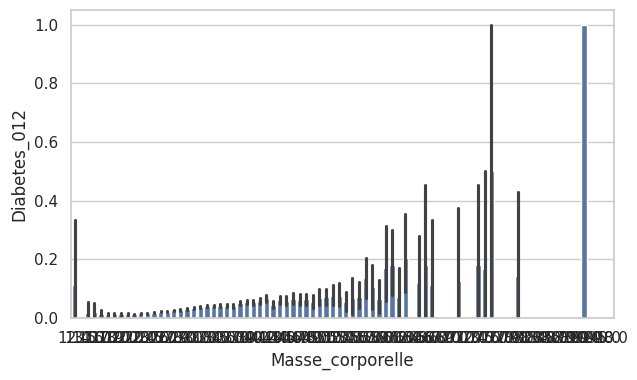

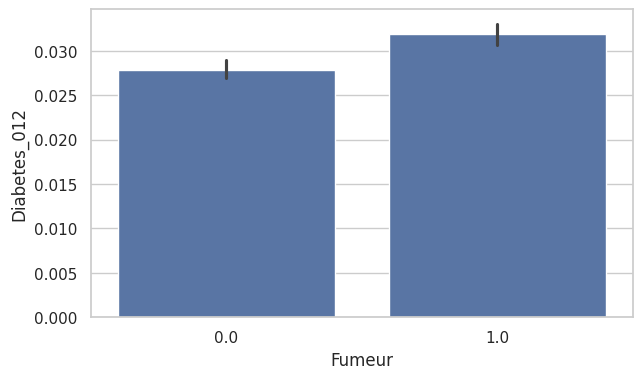

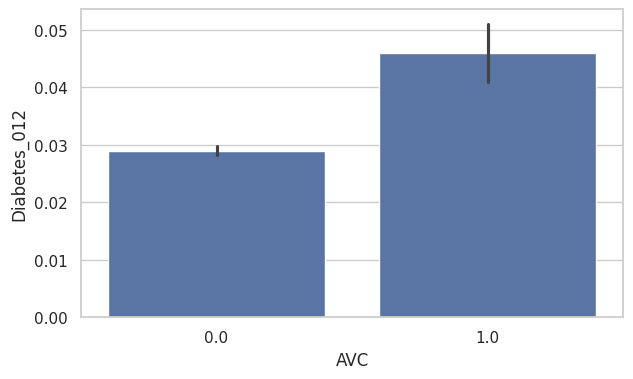

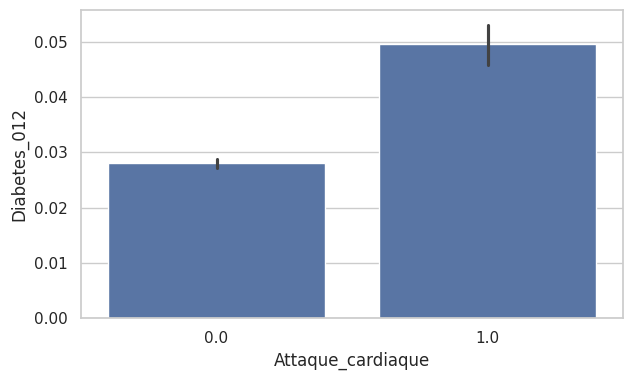

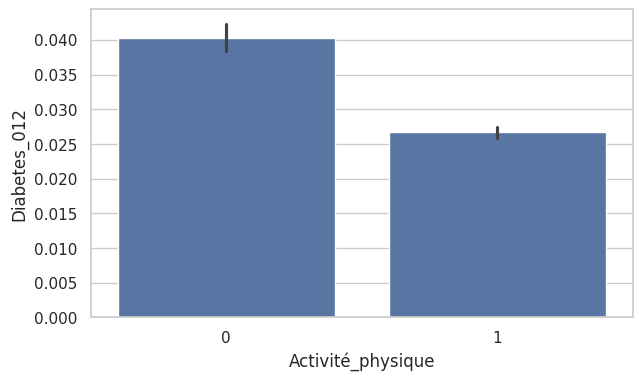

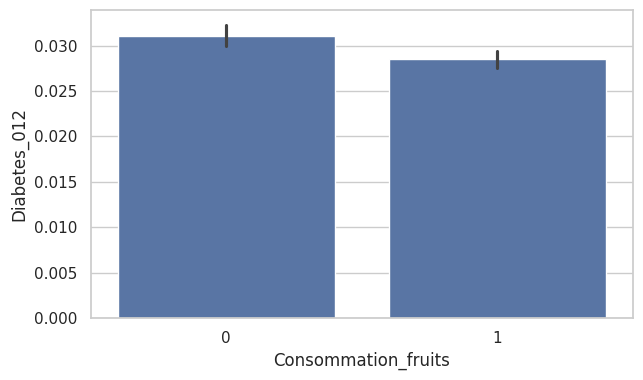

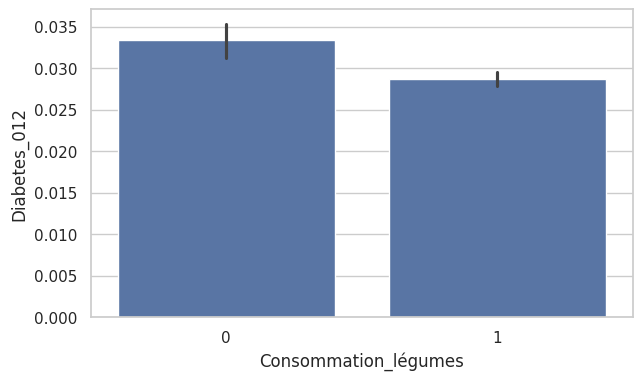

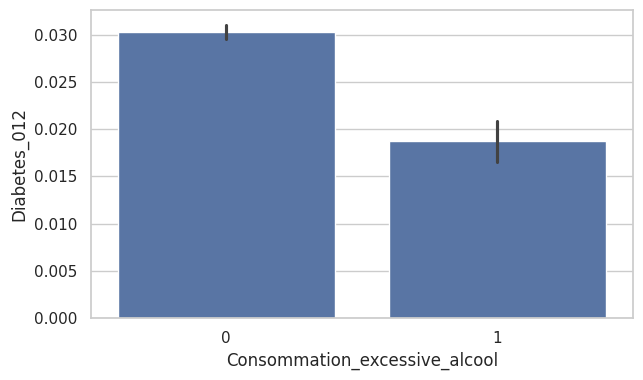

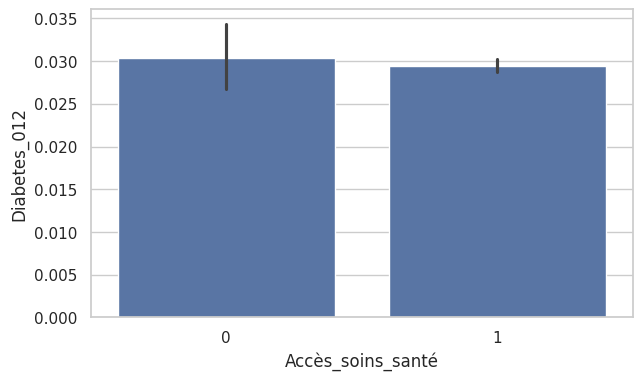

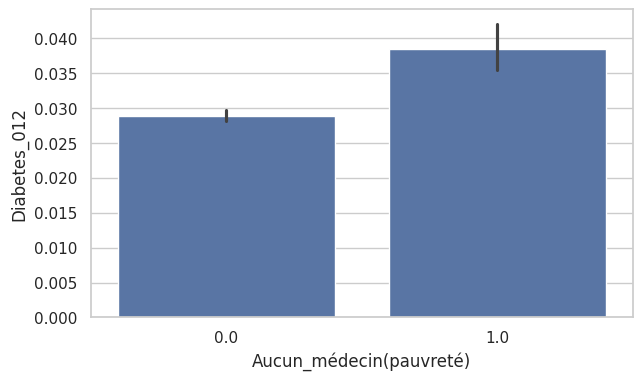

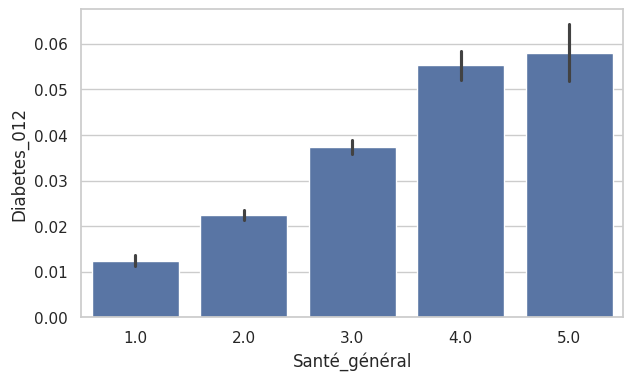

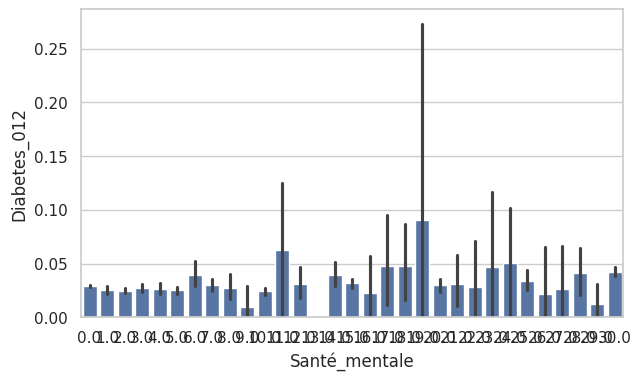

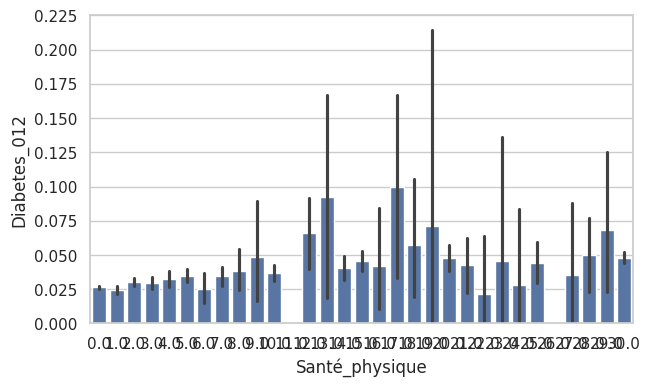

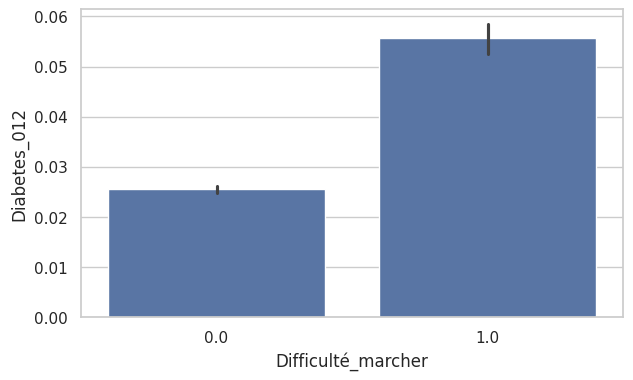

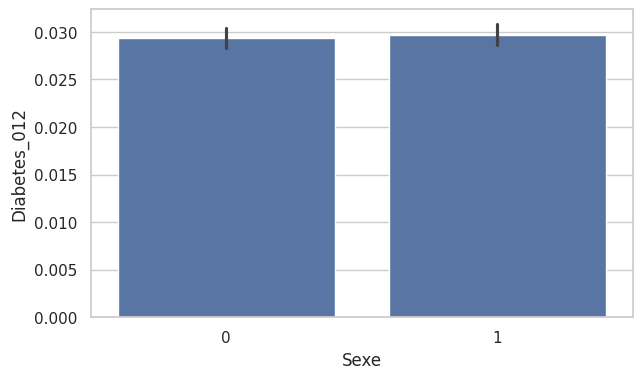

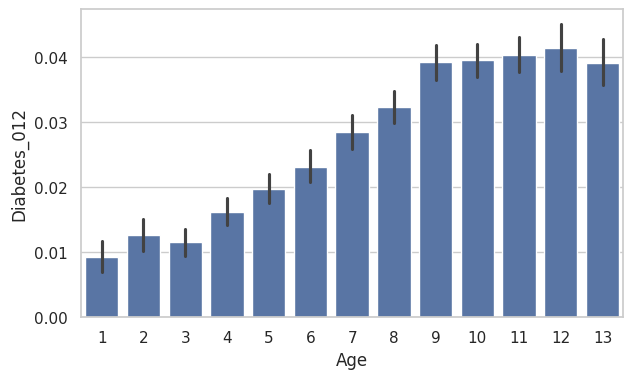

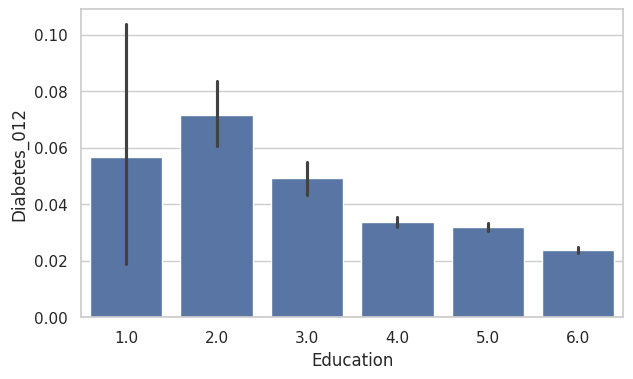

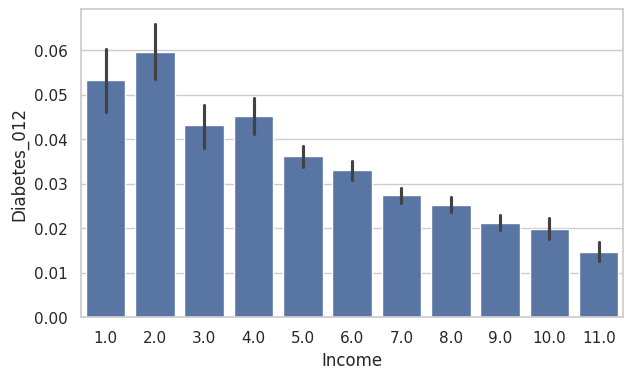

In [ ]:
def barplot(column):
  sns.set(style = 'whitegrid')
  plt.figure(figsize=(7, 4))
  sns.barplot(x=df[column], y=df['Diabetes_012'])

for column in df.columns:
  if column != 'Diabetes_012':
    barplot(column)

In [ ]:
df.drop(columns=["Sexe", "Santé_mentale"], inplace=True)

In [ ]:
df = pd.get_dummies(df, columns=['Hypertension_artérielle', 'Cholestérol_élevé', 'Test_cholestérol', 'Fumeur', 'AVC', 'Attaque_cardiaque', 'Activité_physique', 'Consommation_fruits', 'Consommation_légumes', 'Consommation_excessive_alcool', 'Accès_soins_santé', 'Aucun_médecin(pauvreté)', 'Difficulté_marcher'], prefix=['Hypertension_artérielle', 'Cholestérol_élevé', 'Test_cholestérol', 'Fumeur', 'AVC', 'Attaque_cardiaque', 'Activité_physique', 'Consommation_fruits', 'Consommation_légumes', 'Consommation_excessive_alcool', 'Accès_soins_santé', 'Aucun_médecin(pauvreté)', 'Difficulté_marcher'])

In [ ]:
y = df['Diabetes_012']
X = df.drop(columns=['Diabetes_012'], axis=1)
y = y.to_numpy().reshape(df.shape[0], 1)
print(X.shape)
print(y.shape)

(190155, 32)
(190155, 1)


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state = 42)
print(xtrain.shape)
print(xtest.shape)
ytrain = ytrain.reshape(-1, 1)
print(ytrain.shape)
ytest = ytest.reshape(-1, 1)
print(ytest.shape)
#y = y.reshape(-1, 1)
#print(y.shape)
#print(X.shape)

(133108, 32)
(57047, 32)
(133108, 1)
(57047, 1)


In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}
decision_tree_classifier_model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(decision_tree_classifier_model, param_grid, cv=5)
grid_search.fit(xtrain, ytrain)
print("Meilleurs Paramètres :", grid_search.best_params_)
y_pred = grid_search.predict(xtest)
accuracy = accuracy_score(ytest, y_pred)
print("Score = ", accuracy)

Meilleurs Paramètres : {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Score =  0.9715147159359826


In [ ]:
model = DecisionTreeClassifier(random_state=42, criterion = 'gini', max_depth = 5, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2)

In [ ]:
adaBoosting_classifier = AdaBoostClassifier(model, n_estimators=50, random_state=42)

In [ ]:
adaBoosting_classifier.fit(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                    max_features='sqrt',
                                                    random_state=42),
                   random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143

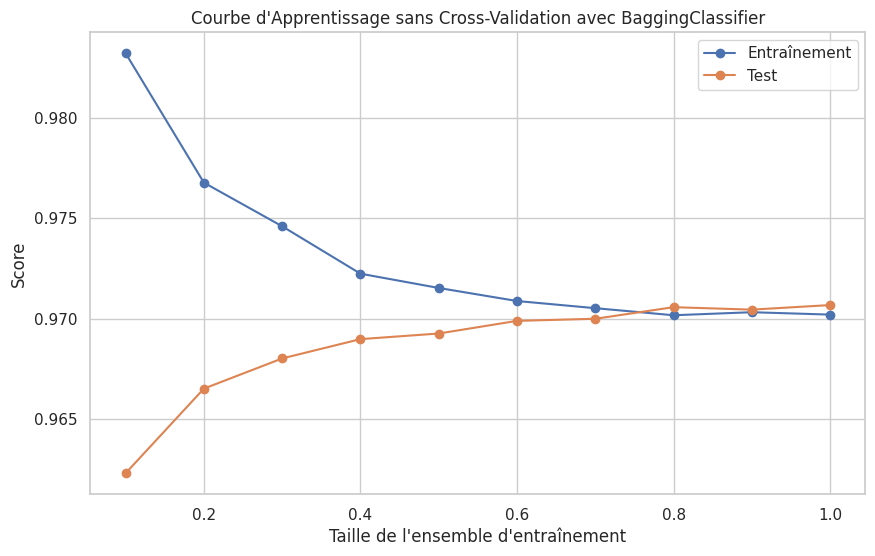

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)

train_scores = []
test_scores = []

for size in train_sizes:
    subset_size = int(size * len(xtrain))
    X_subset = xtrain[:subset_size]
    y_subset = ytrain[:subset_size]

    adaBoosting_classifier.fit(X_subset, y_subset)

    train_predictions = adaBoosting_classifier.predict(X_subset)
    train_accuracy = accuracy_score(y_subset, train_predictions)
    train_scores.append(train_accuracy)

    test_predictions = adaBoosting_classifier.predict(xtest)
    test_accuracy = accuracy_score(ytest, test_predictions)
    test_scores.append(test_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, 'o-', label="Entraînement")
plt.plot(train_sizes, test_scores, 'o-', label="Test")

plt.title("Courbe d'Apprentissage sans Cross-Validation avec BaggingClassifier")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [ ]:
adaBoosting_classifier.score(xtest, ytest)

0.9706733044682455

In [ ]:
with open('diabete_predictor.pkl', 'wb') as model_file:
    pickle.dump(adaBoosting_classifier, model_file)